# Load

In [19]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

from notion_utils import get_notion_client, get_notion_db
n2p = get_notion_client()
notion_df = get_notion_db()

pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
cloud_folder = pth_base + 'My Drive/Projects/Materials/'
img_pth = cloud_folder+'Outputs/Resonators/Summary/'

# Used for plotting from Notions

# Main quadruple plot

IndexError: list index out of range

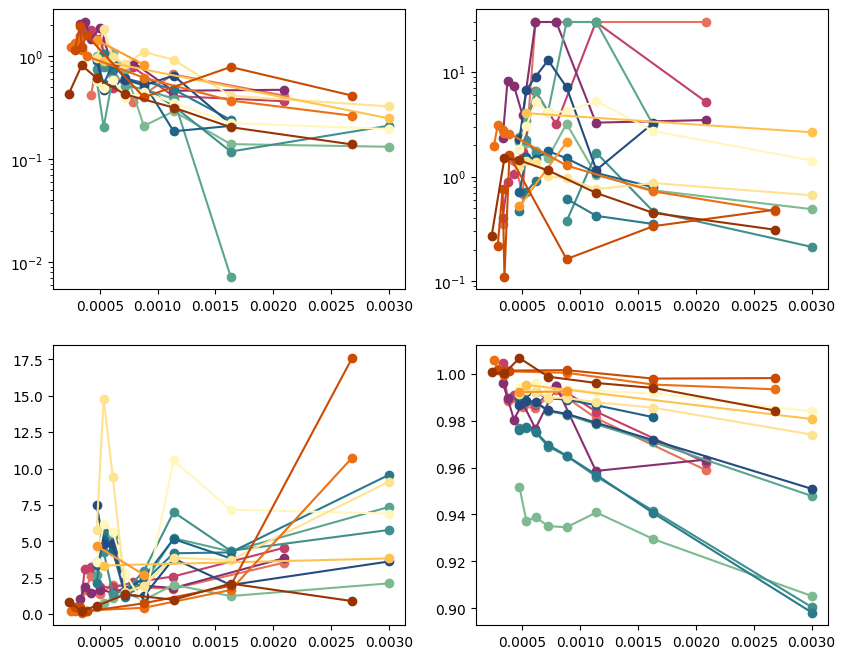

In [28]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 7
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
    ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
    ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
    ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    if xval == 'P_ms':
        a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(img_pth + f"resonators_{current_time}.png")

# Triple plot

Number of unique names in num_silicon_nb: 6
Number of samples with Substrate Silicon and Metal Nb: 47


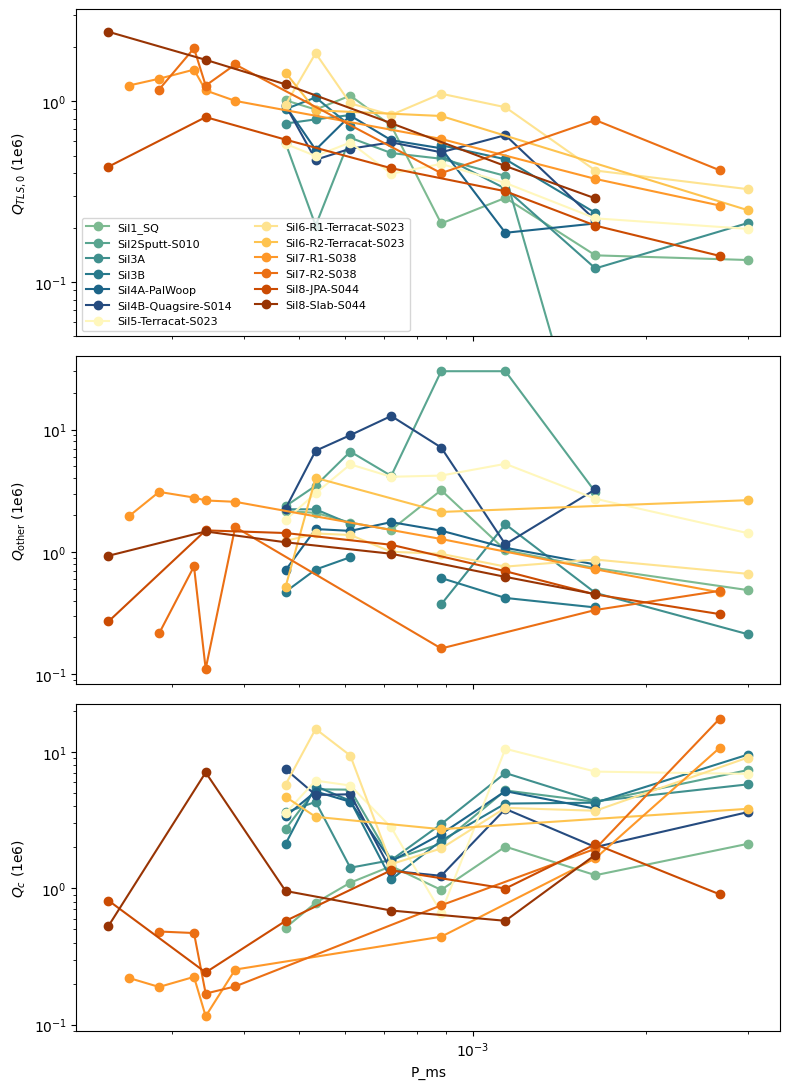

In [31]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(3,1, figsize=(8,11), sharex=True)

xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 7

num_sapphire = (notion_df['Substrate'] == "Sapphire").sum()
b1 = sns.color_palette('flare',num_sapp)

num_silicon_nb = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Nb")
unique_names_in_num_silicon_nb = notion_df[num_silicon_nb]['Name'].nunique()
print(f"Number of unique names in num_silicon_nb: {unique_names_in_num_silicon_nb}")
num_silicon_nb_samples = num_silicon_nb.sum()
print(f"Number of samples with Substrate Silicon and Metal Nb: {num_silicon_nb_samples}")

num_silicon_ta = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Ta")
unique_names_in_num_silicon_ta = notion_df[num_silicon_ta]['Name'].nunique()
num_silicon_ta_samples = num_silicon_ta.sum()

b2 = sns.color_palette('crest',unique_names_in_num_silicon_nb )

b3 = sns.color_palette('YlOrBr',unique_names_in_num_silicon_ta)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            
            col = b2[j]
            j+=1
    else:
        continue
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
    ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
    ax[2].semilogy(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')

ax[2].set_xlabel(xval)
for a in ax: 
    #a.set_xlabel(xval)
    if xval == 'P_ms':
        a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Double plot

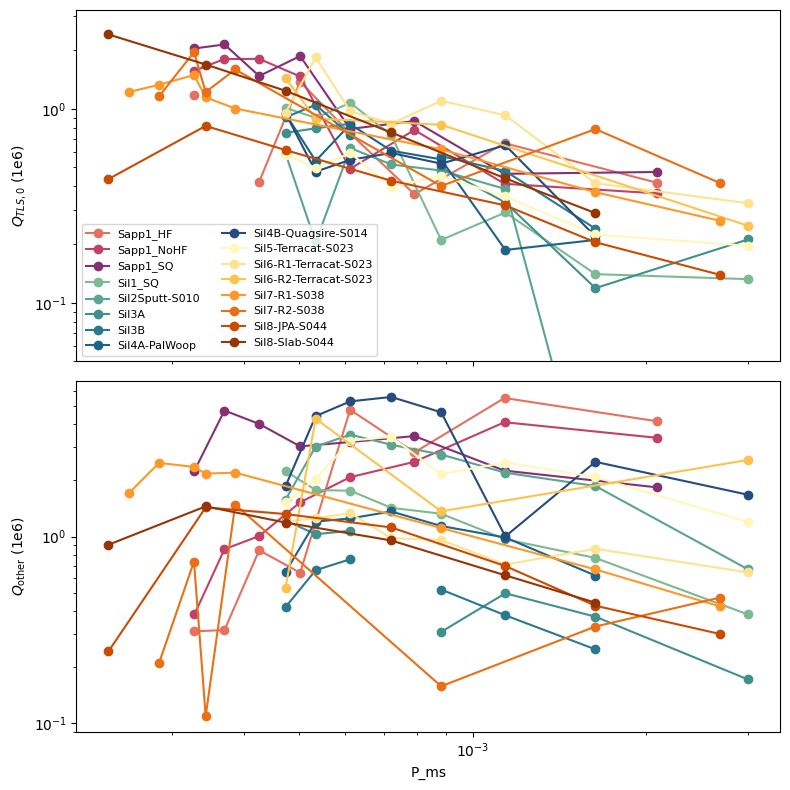

In [26]:
fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'

num_sapphire = (notion_df['Substrate'] == "Sapphire")
unique_names_in_num_sapphire = notion_df[num_sapphire]['Name'].nunique()

b1 = sns.color_palette('flare',unique_names_in_num_sapphire)

num_silicon_nb = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Nb")
unique_names_in_num_silicon_nb = notion_df[num_silicon_nb]['Name'].nunique()

num_silicon_ta = (notion_df['Substrate'] == "Silicon") & (notion_df['Metal'] == "Ta")
unique_names_in_num_silicon_ta = notion_df[num_silicon_ta]['Name'].nunique()

b2 = sns.color_palette('crest',unique_names_in_num_silicon_nb )
b3 = sns.color_palette('YlOrBr',unique_names_in_num_silicon_ta)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            
            col = b2[j]
            j+=1
    else:
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
    #ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
    ax[1].semilogy(group[xval], group['Q_Hi'], 'o-', label=name, color=col)
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')

ax[1].set_xlabel(xval)
for a in ax: 
    #a.set_xlabel(xval)
    if xval == 'P_ms':
        a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

In [4]:
notion_df.columns

Index(['Gap (um)', 'Target Freq. (GHz)', 'P_ms', 'File', 'Qother (1e6)',
       'Measurement', 'Notes', 'Freq (GHz)', 'Package', 'Qother err (1e6)',
       'Qc err (1e6)', 'Samples', 'Thickness (nm)', 'QTLS0 (1e6)',
       'Surface Prep', 'Fridge Cool Down', 'Depo', 'QTLS0 err (1e6)',
       'Qc (1e6)', 'Date', 'Metal', 'Substrate', 'Pattern', 'Pin (um)',
       'Growth temp (C)', 'Separation (um)', 'Name', 'PageID', 'Row_Hash'],
      dtype='object')

In [13]:
import re

value = notion_df['Growth temp (C)'][21]
number = float(re.search(r'\d+\.?\d*', value).group()) if isinstance(value, str) else value
number

725.0

In [17]:
value = notion_df['Surface Prep'][21]
value[1:-1]

"'Ar Clean 400C/50W/30s, Outgas 775C 30 min'"

In [19]:
value = notion_df['Notes'][15]


Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: 
Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: O3/BOE
Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: O3/BOE/O3 short
Growth Temp: 725 C, Surface Prep: Ar Clean 400C/50W/30s, Outgas 775C 30 min, Post Clean: O3/BOE
Growth Temp: 725 C, Surface Prep: Ar Clean 400C/50W/30s, Outgas 775C 30 min, Post Clean: O3/BOE
Growth Temp: 725 C, Surface Prep: Oxide term RCA, Ar clean 400C/50W/30s, Outgas 775C 10 min, Post Clean: Nanostrip/BOE
Growth Temp: 725 C, Surface Prep: Oxide term RCA, Ar clean 400C/50W/30s, Outgas 775C 10 min, Post Clean: Nanostrip/BOE
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp: 0 C, Surface Prep: Pre-chamber bake , Post Clean: Waffle
Growth Temp: 0 C, Surface Prep: , Post Clean: 
Growth Temp: 0 C, Surface Prep: , Post Clean: 
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp:  C,

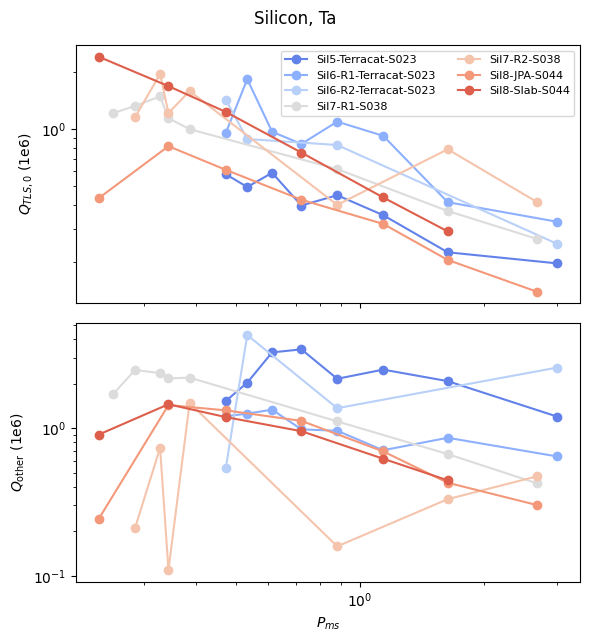

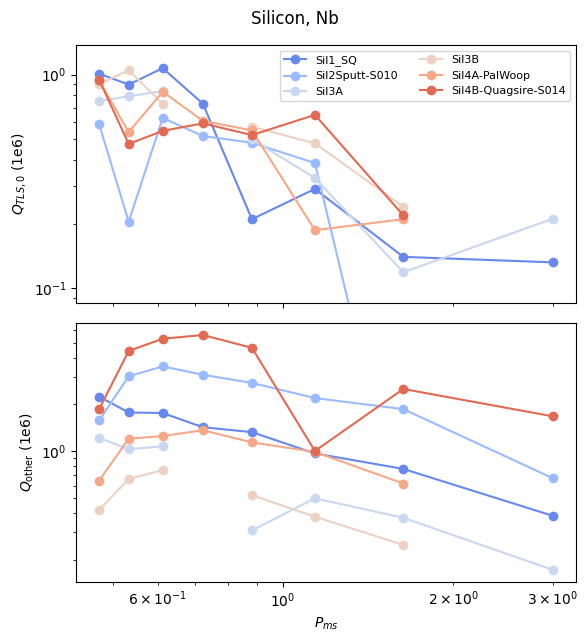

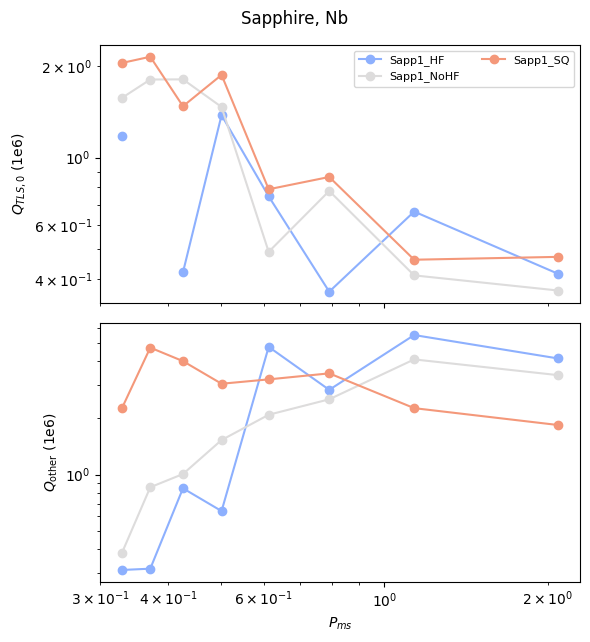

In [27]:
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
for substrate in notion_df['Substrate'].unique():
    for metal in notion_df['Metal'].unique():
        filtered_group = notion_df[(notion_df['Substrate'] == substrate) & (notion_df['Metal'] == metal)]
        if filtered_group.empty:
            continue
        else:
            fig, ax = plt.subplots(2,1, figsize=(6,6.5), sharex=True)
        col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
        for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
            #temp = notion_df['Growth temp (C)']
            first_index = group.index[0]
            note = f"Growth Temp: {group['Growth temp (C)'].iloc[0][1:-1]} C, Surface Prep: {group['Surface Prep'].iloc[0][2:-2]}, Post Clean: {group['Post clean'].iloc[0]}"
            print(note)
            group = group.sort_values(by=xval)
            ax[0].loglog(1e3*group[xval], group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
            #ax[1].loglog(1e3*group[xval], group['Qother (1e6)'], 'o-', label=f"{name}", color=col[idx])
            ax[1].loglog(1e3 * group[xval], group['Q_Hi'], 'o-', label=f"{name}", color=col[idx])

        ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
        ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
        ax[1].set_xlabel('$P_{ms}$')
        ax[0].legend(ncol=2, fontsize=8)

        fig.suptitle(f"{substrate}, {metal}")
        fig.tight_layout()
        if metal=='Nb' and substrate=='Silicon':
            ax[0].set_ylim(bottom=0.085)

Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: 
Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: O3/BOE
Growth Temp: 0 C, Surface Prep: Ar Clean 10W/5s, 10 nm Nb seed, Post Clean: O3/BOE/O3 short
Growth Temp: 725 C, Surface Prep: Ar Clean 400C/50W/30s, Outgas 775C 30 min, Post Clean: O3/BOE
Growth Temp: 725 C, Surface Prep: Ar Clean 400C/50W/30s, Outgas 775C 30 min, Post Clean: O3/BOE
Growth Temp: 725 C, Surface Prep: Oxide term RCA, Ar clean 400C/50W/30s, Outgas 775C 10 min, Post Clean: Nanostrip/BOE
Growth Temp: 725 C, Surface Prep: Oxide term RCA, Ar clean 400C/50W/30s, Outgas 775C 10 min, Post Clean: Nanostrip/BOE
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp: 0 C, Surface Prep: Pre-chamber bake , Post Clean: Waffle
Growth Temp: 0 C, Surface Prep: , Post Clean: 
Growth Temp: 0 C, Surface Prep: , Post Clean: 
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp:  C, Surface Prep: , Post Clean: 
Growth Temp:  C,

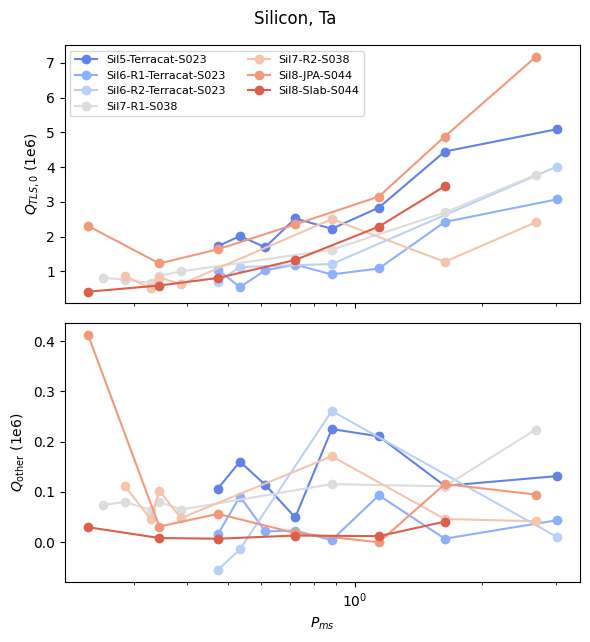

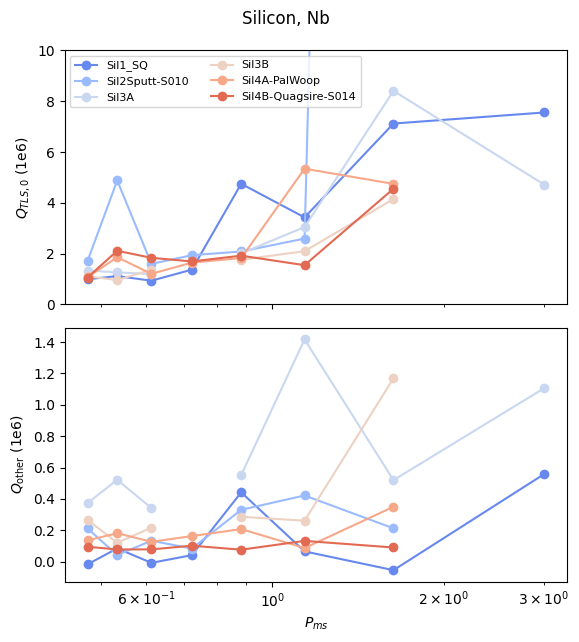

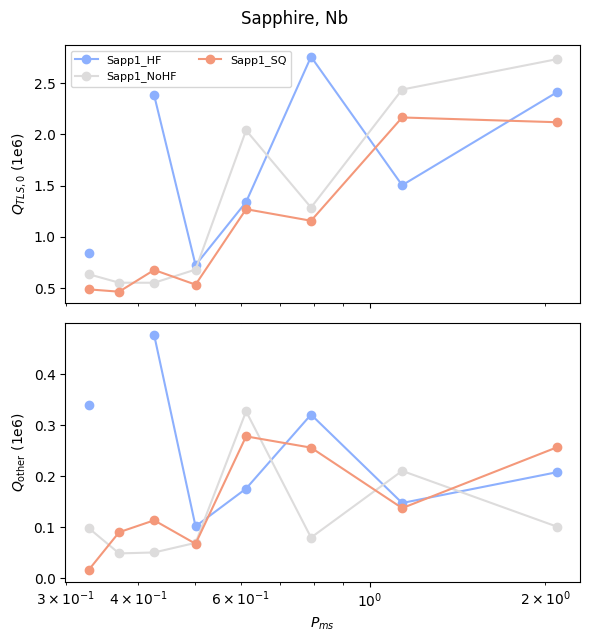

In [24]:
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
for substrate in notion_df['Substrate'].unique():
    for metal in notion_df['Metal'].unique():
        filtered_group = notion_df[(notion_df['Substrate'] == substrate) & (notion_df['Metal'] == metal)]
        if filtered_group.empty:
            continue
        else:
            fig, ax = plt.subplots(2,1, figsize=(6,6.5), sharex=True)
        col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
        for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
            #temp = notion_df['Growth temp (C)']
            first_index = group.index[0]
            note = f"Growth Temp: {group['Growth temp (C)'].iloc[0][1:-1]} C, Surface Prep: {group['Surface Prep'].iloc[0][2:-2]}, Post Clean: {group['Post clean'].iloc[0]}"
            print(note)
            group = group.sort_values(by=xval)
            ax[0].semilogx(1e3*group[xval], 1/group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
            ax[1].semilogx(1e3*group[xval],-(1/group['Qother (1e6)']-1/group['Q_Hi']), 'o-', label=f"{name}", color=col[idx])
        if metal=='Nb' and substrate=='Silicon':
            ax[0].set_ylim(top=10, bottom=0)
        ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
        ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
        ax[1].set_xlabel('$P_{ms}$')
        ax[0].legend(ncol=2, fontsize=8)

        fig.suptitle(f"{substrate}, {metal}")
        fig.tight_layout()


In [11]:
notion_df['Sputterer ID'][0]

"['S044']"

# Nice Ta plot

SLab
1.  S023: SVM, Ar clean 20C/10W/5s, 10 nm Nb seed, 0 C, 
SLab
2.  S023: SVM, Ar clean 20C/10W/5s, 10 nm Nb seed, 0 C, O3/BOE
SLab
3.  S023: SVM, Ar clean 20C/10W/5s, 10 nm Nb seed, 0 C, O3/BOE/O3 short
ScalinQ
4.  S038: SVM, Ar clean 175C/50W/30s, Outgas 700 C 30 min, 600 C, O3/BOE
SLab
5.  S038: SVM, Ar clean 175C/50W/30s, Outgas 700 C 30 min, 600 C, O3/BOE
JPA
6.  S044: Siegert, Oxide term. RCA, Ar clean 175C/50W/30s, Outgas 775C 10 min, 
 600 C, Nanostrip/BOE, Junction fab
Slab-New
7.  S044: Siegert, Oxide term. RCA, Ar clean 175C/50W/30s, Outgas 775C 10 min, 
 600 C, Nanostrip/BOE, Junction fab


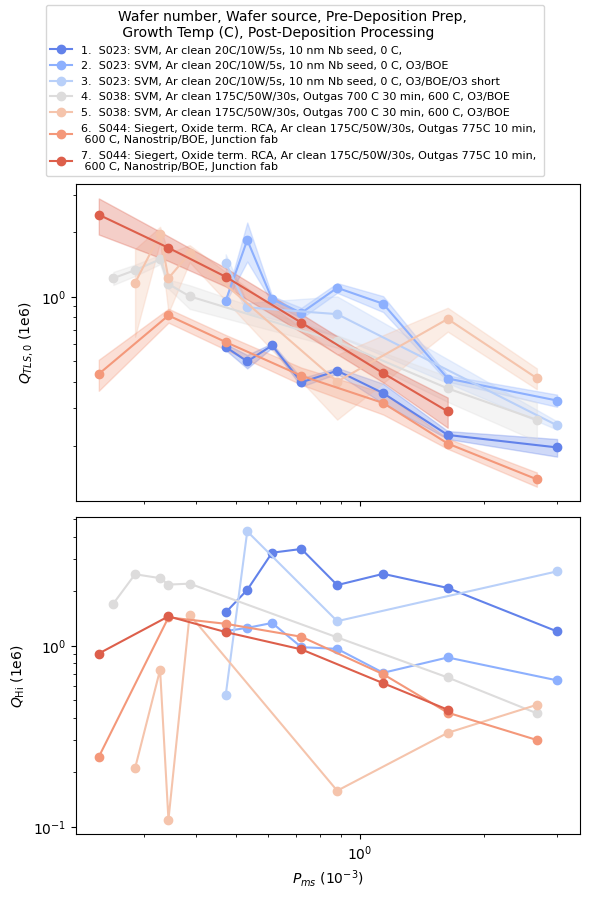

In [20]:
xval = 'P_ms'
#xval = 'Gap (um)'
#filtered_group = notion_df[(notion_df['Substrate'] == 'Silicon') & (notion_df['Metal'] == 'Nb')]
filtered_group = notion_df[(notion_df['Substrate'] == 'Silicon') & (notion_df['Metal'] == 'Ta')]
if not filtered_group.empty:
    fig, ax = plt.subplots(2, 1, figsize=(6, 9), sharex=True)
    col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
    for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
        wafer_first_word = group['Wafer'].iloc[0].split()[0] if isinstance(group['Wafer'].iloc[0], str) else "N/A"
        sputterer_id = group['Sputterer ID'].iloc[0] if isinstance(group['Sputterer ID'].iloc[0], str) else "N/A"
        note_parts = []
        # if sputterer_id:
        #     note_parts.append(f" {sputterer_id[2:-2]}:")
        # if group['Growth temp (C)'].iloc[0]:
        #     note_parts.append(f"{group['Growth temp (C)'].iloc[0][1:-1]} C,")
        # if group['Surface Prep'].iloc[0]:
        #     note_parts.append(f"{group['Surface Prep'].iloc[0][2:-2]},")
        # if group['Post clean'].iloc[0]:
        #     note_parts.append(f"{group['Post clean'].iloc[0]},")
        if wafer_first_word:
            note_parts.insert(0, f"{idx+1}. ")
            note_parts.insert(1, f"{sputterer_id[2:-2]}:")
            note_parts.insert(2, f"{wafer_first_word[2:]},")
            note_parts.insert(3, f"{group['Surface Prep'].iloc[0][2:-2]},")
            if idx>4:
                note_parts.insert(4, "\n")
                note_parts.insert(5, f"{group['Growth temp (C)'].iloc[0][1:-1]} C,")
                note_parts.insert(6, f"{group['Post clean'].iloc[0]}")
            else:
                note_parts.insert(4, f"{group['Growth temp (C)'].iloc[0][1:-1]} C,")
                note_parts.insert(5, f"{group['Post clean'].iloc[0]}")
            print(group["Package"].iloc[0])

        # if group['Package'].iloc[0]:
        #     note_parts.append(f"Package: {group['Package'].iloc[0]}")
        note = " ".join(note_parts)
        print(note)
        group = group.sort_values(by=xval)
        #ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
        ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=note, color=col[idx])
        ax[1].loglog(1e3 * group[xval], group['Q_Hi'], 'o-', label=note, color=col[idx])
        
        #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, )
        #
        fig.tight_layout()
        #ax[1].loglog(1e3 * group[xval], group['Q_Hi']/1e6, 'o-', label=f"{name}", color=col[idx])
        ax[0].fill_between(
            1e3 * group[xval],
            group['QTLS0 (1e6)'] - group['QTLS0 err (1e6)'],
            group['QTLS0 (1e6)'] + group['QTLS0 err (1e6)'],
            color=col[idx],
            alpha=0.3
        )
    ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
    ax[1].set_ylabel('$Q_{\mathrm{Hi}}$ (1e6)')
    ax[1].set_xlabel('$P_{ms}$ $(10^{-3})$')

    #ax[0].legend(ncol=2, fontsize=8)
    #fig.suptitle('Tantalum on Silicon')
    fig.tight_layout()
    
    #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="Wafer number, Wafer source, Pre-Deposition Prep, \n Growth Temp (C), Post-Deposition Processing")
    fig.subplots_adjust(top=0.8)  # Adjust the top space to make room for the legend
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center',  fontsize=8, title="Wafer number, Wafer source, Pre-Deposition Prep, \n Growth Temp (C), Post-Deposition Processing")
#fig.suptitle('Ta on Silicon')
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(img_pth + f"resonators_silicon_ta_{current_time}.png")


# Nice Nb Si plot

KJL:
['Before chamber bake']
S010: Before chamber bake, Flux trapping holes added,
KJL: Junction fab,
KJL: Junction fab,
['Ar clean 20C/10W/5s']
S014: Ar clean 20C/10W/5s, Junction fab,
KJL:


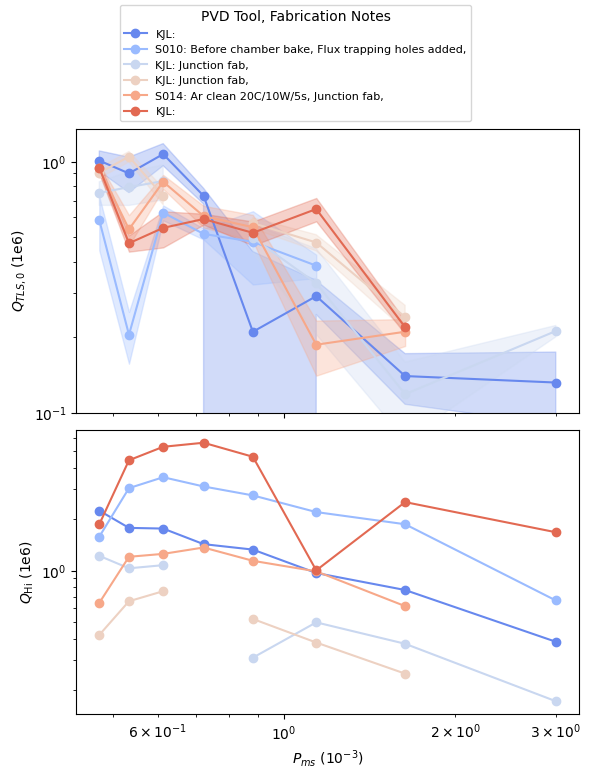

In [146]:
xval = 'P_ms'
#xval = 'Gap (um)'
filtered_group = notion_df[(notion_df['Substrate'] == 'Silicon') & (notion_df['Metal'] == 'Nb')]
if not filtered_group.empty:
    fig, ax = plt.subplots(2, 1, figsize=(6, 7.8), sharex=True)
    col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
    for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
        sputterer_id = group['Sputterer ID'].iloc[0] if isinstance(group['Sputterer ID'].iloc[0], str) else "N/A"
        note_parts = []
        # if sputterer_id:
        #     note_parts.append(f" {sputterer_id[2:-2]}:")
        # if group['Growth temp (C)'].iloc[0]:
        #     note_parts.append(f"{group['Growth temp (C)'].iloc[0][1:-1]} C,")

        # if group['Post clean'].iloc[0]:
        #     note_parts.append(f"{group['Post clean'].iloc[0]},")
        note_parts.insert(0, f"{sputterer_id[2:-2]}:")
        if group['Surface Prep'].iloc[0][2:-2]:
             print(group['Surface Prep'].iloc[0])
             note_parts.append(f"{group['Surface Prep'].iloc[0][2:-2]},")
        if group['Post clean'].iloc[0]:
             note_parts.append(f"{group['Post clean'].iloc[0]},")
        #note_parts.insert(1, f"{group['Surface Prep'].iloc[0][2:-2]},")
            

        #note_parts.insert(2, f"{group['Post clean'].iloc[0]}")

        # if group['Package'].iloc[0]:
        #     note_parts.append(f"Package: {group['Package'].iloc[0]}")
        note = " ".join(note_parts)
        print(note)
        group = group.sort_values(by=xval)
        #ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
        ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=note, color=col[idx])
        ax[1].loglog(1e3 * group[xval], group['Q_Hi'], 'o-', label=note, color=col[idx])
        
        #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, )
        #
        fig.tight_layout()
        #ax[1].loglog(1e3 * group[xval], group['Q_Hi']/1e6, 'o-', label=f"{name}", color=col[idx])
        ax[0].fill_between(
            1e3 * group[xval],
            group['QTLS0 (1e6)'] - group['QTLS0 err (1e6)'],
            group['QTLS0 (1e6)'] + group['QTLS0 err (1e6)'],
            color=col[idx],
            alpha=0.3
        )
    ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
    ax[1].set_ylabel('$Q_{\mathrm{Hi}}$ (1e6)')
    ax[1].set_xlabel('$P_{ms}$ $(10^{-3})$')

    #ax[0].legend(ncol=2, fontsize=8)
    #fig.suptitle('Tantalum on Silicon')
    fig.tight_layout()
    ax[0].set_ylim(bottom=0.1)
    #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="Wafer number, Wafer source, Pre-Deposition Prep, \n Growth Temp (C), Post-Deposition Processing")
    fig.subplots_adjust(top=0.84)  # Adjust the top space to make room for the legend
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center',  fontsize=8, title="PVD Tool, Fabrication Notes")
#fig.suptitle('Nb on Silicon')
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(img_pth + f"resonators_silicon_ta_{current_time}.png")


# Nice Nb Sapphire plot

HF,




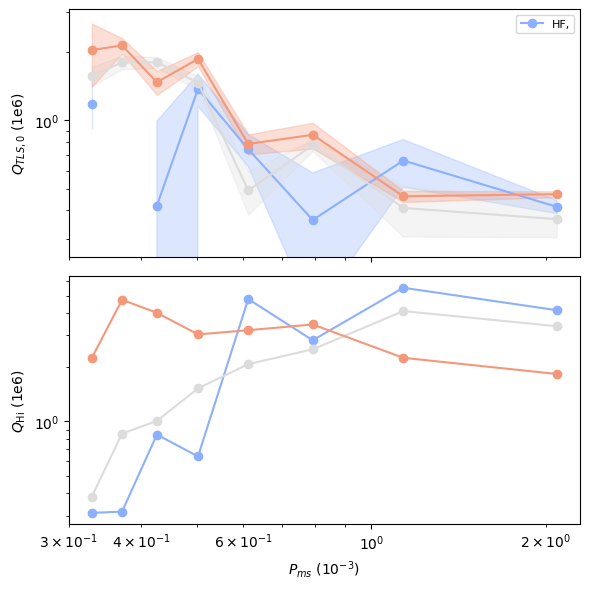

In [147]:
xval = 'P_ms'
#xval = 'Gap (um)'
filtered_group = notion_df[(notion_df['Substrate'] == 'Sapphire') & (notion_df['Metal'] == 'Nb')]
if not filtered_group.empty:
    fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
    col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
    for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
        sputterer_id = group['Sputterer ID'].iloc[0] if isinstance(group['Sputterer ID'].iloc[0], str) else "N/A"
        note_parts = []
        # if sputterer_id:
        #     note_parts.append(f" {sputterer_id[2:-2]}:")
        # if group['Growth temp (C)'].iloc[0]:
        #     note_parts.append(f"{group['Growth temp (C)'].iloc[0][1:-1]} C,")

        # if group['Post clean'].iloc[0]:
        #     note_parts.append(f"{group['Post clean'].iloc[0]},")
        if group['Surface Prep'].iloc[0][2:-2]:
             print(group['Surface Prep'].iloc[0])
             note_parts.append(f"{group['Surface Prep'].iloc[0][2:-2]},")
        if group['Post clean'].iloc[0]:
             note_parts.append(f"{group['Post clean'].iloc[0]},")
        #note_parts.insert(1, f"{group['Surface Prep'].iloc[0][2:-2]},")
            

        #note_parts.insert(2, f"{group['Post clean'].iloc[0]}")

        # if group['Package'].iloc[0]:
        #     note_parts.append(f"Package: {group['Package'].iloc[0]}")
        note = " ".join(note_parts)
        print(note)
        group = group.sort_values(by=xval)
        #ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
        ax[0].loglog(1e3 * group[xval], group['QTLS0 (1e6)'], 'o-', label=note, color=col[idx])
        ax[1].loglog(1e3 * group[xval], group['Q_Hi'], 'o-', label=note, color=col[idx])
        
        #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, )
        #
        fig.tight_layout()
        #ax[1].loglog(1e3 * group[xval], group['Q_Hi']/1e6, 'o-', label=f"{name}", color=col[idx])
        ax[0].fill_between(
            1e3 * group[xval],
            group['QTLS0 (1e6)'] - group['QTLS0 err (1e6)'],
            group['QTLS0 (1e6)'] + group['QTLS0 err (1e6)'],
            color=col[idx],
            alpha=0.3
        )
    ax[0].set_ylim(bottom=0.25)
    ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
    ax[1].set_ylabel('$Q_{\mathrm{Hi}}$ (1e6)')
    ax[1].set_xlabel('$P_{ms}$ $(10^{-3})$')

    ax[0].legend(fontsize=8)
    #fig.suptitle('Tantalum on Silicon')
    fig.tight_layout()
#fig.suptitle('Nb on Sapphire')
    #ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title="Wafer number, Wafer source, Pre-Deposition Prep, \n Growth Temp (C), Post-Deposition Processing")
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(img_pth + f"resonators_silicon_ta_{current_time}.png")
# for a in ax:
#     y_ticks = a.get_yticks()
#     a.set_yticks(sorted(set(y_ticks.tolist() + [0.5, 1,2])))
#     a.set_yticklabels([f"{tick:.1f}" for tick in a.get_yticks()])

In [ ]:
wafer_first_word = group['Wafer'].iloc[0].split()[0] if isinstance(group['Wafer'].iloc[0], str) else "N/A"
sputterer_id = group['Sputterer ID'].iloc[0] if isinstance(group['Sputterer ID'].iloc[0], str) else "N/A"
note_parts = []
if sputterer_id:
    note_parts.append(f"Sputterer ID: {sputterer_id[2:-2]}")
if group['Growth temp (C)'].iloc[0]:
    note_parts.append(f"Growth Temp: {group['Growth temp (C)'].iloc[0][1:-1]} C")
if group['Surface Prep'].iloc[0]:
    note_parts.append(f"Surface Prep: {group['Surface Prep'].iloc[0][2:-2]}")
if group['Post clean'].iloc[0]:
    note_parts.append(f"Post Clean: {group['Post clean'].iloc[0]}")
if wafer_first_word:
    note_parts.append(f"Wafer: {wafer_first_word[2:]}")
if group['Package'].iloc[0]:
    note_parts.append(f"Package: {group['Package'].iloc[0]}")
note = ", ".join(note_parts)
print(note)

# Separate plots

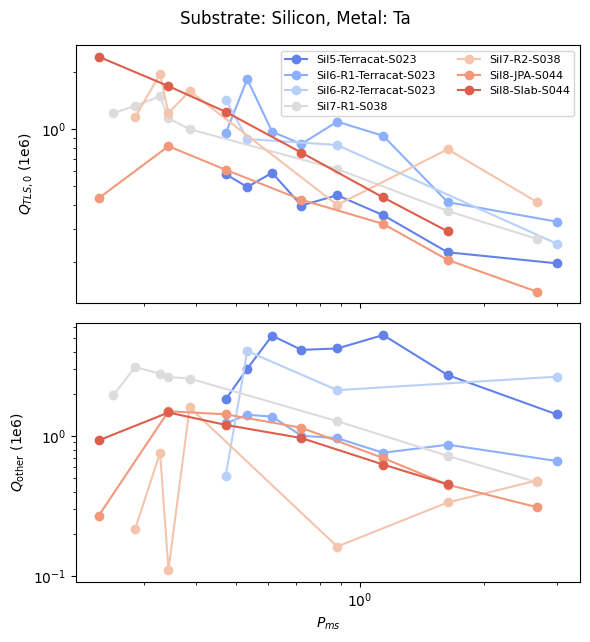

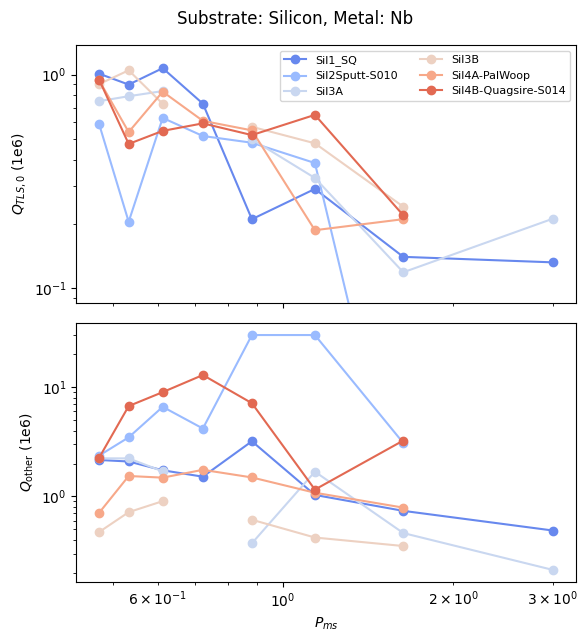

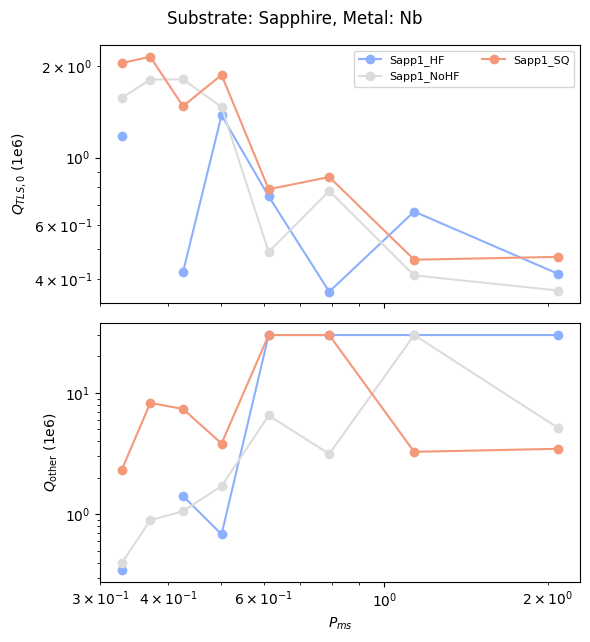

In [24]:

xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
for substrate in notion_df['Substrate'].unique():
    for metal in notion_df['Metal'].unique():
        filtered_group = notion_df[(notion_df['Substrate'] == substrate) & (notion_df['Metal'] == metal)]
        if filtered_group.empty:
            continue
        else:
            fig, ax = plt.subplots(2,1, figsize=(6,6.5), sharex=True)
        col = sns.color_palette('coolwarm', len(filtered_group['Name'].unique()))
        for idx, (name, group) in enumerate(filtered_group.groupby('Name')):
            group = group.sort_values(by=xval)
            ax[0].loglog(1e3*group[xval], group['QTLS0 (1e6)'], 'o-', label=f"{name}", color=col[idx])
            ax[1].loglog(1e3*group[xval], group['Qother (1e6)'], 'o-', label=f"{name}", color=col[idx])
        ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
        ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
        ax[1].set_xlabel('$P_{ms}$')
        ax[0].legend(ncol=2, fontsize=8)

        fig.suptitle(f"Substrate: {substrate}, Metal: {metal}")
        fig.tight_layout()
        if metal=='Nb' and substrate=='Silicon':
            ax[0].set_ylim(bottom=0.085)


# current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
# fig.savefig(f"resonators_{current_time}.png")

# Just qother

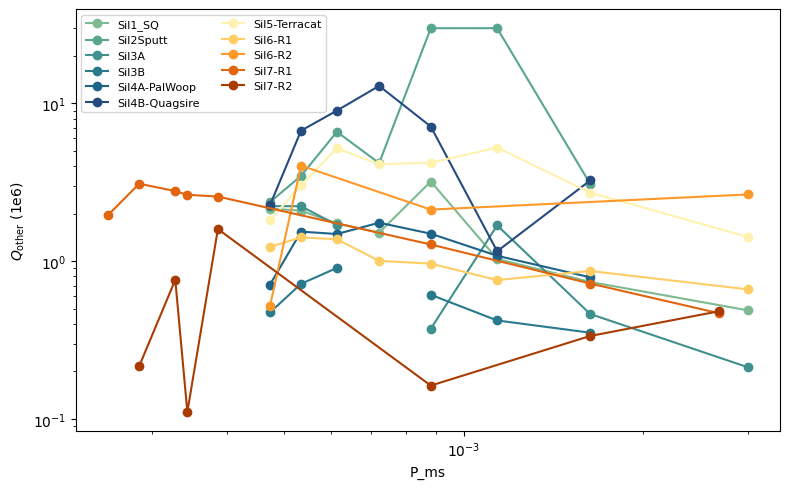

In [10]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1,1, figsize=(8,5))
xval = 'P_ms'
#xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 5
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        continue
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax.semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)

    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax .legend(ncol=2, fontsize=8)
 
ax.set_ylabel('$Q_{\mathrm{other}}$ (1e6)')


ax.set_xlabel(xval)
if xval == 'P_ms':
    ax.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

In [ ]:
gap = [2,4,6,8,10,12,14,16]
qc_val = [3.447,
	2.683,
	2.838,
	2.027,
	2.044,
	2.383,
	2.219,
	0.2815]
#ax[2].plot(gap, qc_val, 'o-', label='Qc (1e6) from fit', color='black')

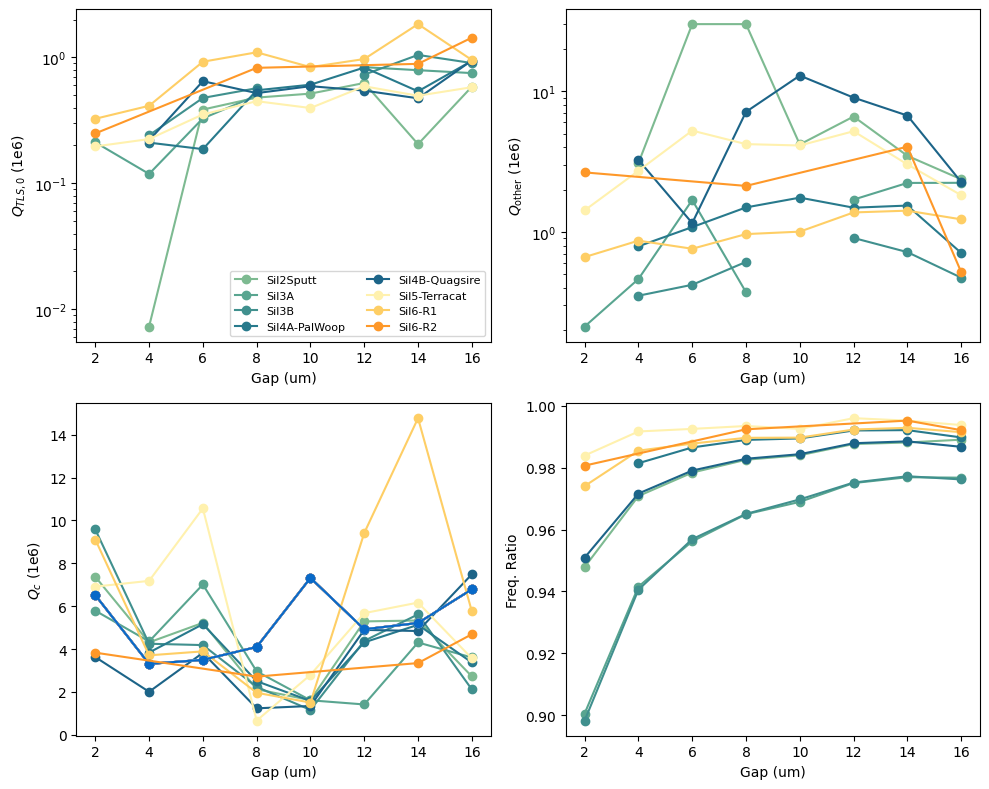

In [543]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))
import numpy as np
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
#xval = 'P_ms'
xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 5
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Pattern'].iloc[0]=='Houck_Sil': #'QcAdj_Sil':
        if group['Substrate'].iloc[0]=='Silicon':
            if group['Metal'].iloc[0]=='Ta':
                col=b3[k]
                k+=1
            else:
                col = b2[j]
                j+=1
        else:
            continue
            # col = b1[i]
            # i+=1
        group = group.sort_values(by=xval)
    

        try:
            #ax[2].plot(group[xval], qc, 'o-', label='Qc (1e6) from fit', color='black')
            #ax[2].plot(group[xval], 2e2*gap**2/group['Freq (GHz)']**2/group['Pin (um)']**3.5, 'o-', label='Qc (1e6) from fit', color='gray')
            #ax[2].plot(group[xval], gap**2.5/group['Freq (GHz)']**2/group['Pin (um)']**2.5, 'o-', label='Qc (1e6) from fit', color='gray')
            ax[2].plot(pin/1.77*1e6, 0.085*qc_func(eps_sil, 14.18e-6, gap, pin, 50, freq)/1e6, 'o-') 

        except:
            pass
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
        ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col)
        ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col)
        ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col)
        ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
#ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    #a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Compare variation 

In [ ]:
mean_qc = notion_df['Qc (1e6)'].mean()
std_qc = notion_df['Qc (1e6)'].std()

mean_qc, std_qc

filtered_df = notion_df[notion_df['Pattern'].isin(['Houck_Sapp', 'Houck_Sil'])]
filtered_df.head()

mean_qc_per_gap_by_substrate = filtered_df.groupby(['Substrate', 'Gap (um)','Metal'])['Qc (1e6)'].mean()
print(mean_qc_per_gap_by_substrate)

std_qc_per_gap_by_substrate = filtered_df.groupby(['Substrate', 'Gap (um)', 'Metal'])['Qc (1e6)'].std()
print(std_qc_per_gap_by_substrate)

Substrate  Gap (um)  Metal
Sapphire   2         Nb       3.977700
           4         Nb       2.046500
           6         Nb       2.024067
           8         Nb       1.777467
           10        Nb       1.657967
           12        Nb       2.436367
           14        Nb       2.198800
           16        Nb       0.535200
Silicon    2         Nb       5.698320
                     Ta       6.618700
           4         Nb       3.334600
                     Ta       5.444450
           6         Nb       4.571483
                     Ta       7.227200
           8         Nb       2.005600
                     Ta       1.779667
           10        Nb       1.461467
                     Ta       2.150950
           12        Nb       3.565850
                     Ta       7.545450
           14        Nb       4.335417
                     Ta       8.094567
           16        Nb       3.304117
                     Ta       4.672800
Name: Qc (1e6), dtype: float64
Substr

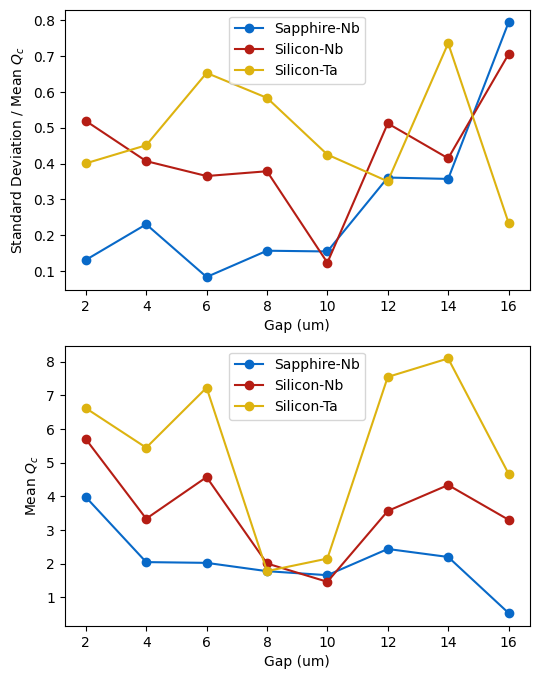

In [530]:
std_df= std_qc_per_gap_by_substrate/mean_qc_per_gap_by_substrate
fig, ax = plt.subplots(2,1, figsize=(6,8))
for (substrate, material), data in std_df.groupby(level=[0, 2]):
    ax[0].plot(data.index.get_level_values('Gap (um)'), data.values, 'o-',label=f"{substrate}-{material}")
ax[0].set_xlabel('Gap (um)')
ax[0].set_ylabel('Standard Deviation / Mean $Q_c$')
ax[0].legend()


#std_df= std_qc_per_gap_by_substrate/mean_qc_per_gap_by_substrate

for (substrate, material), data in mean_qc_per_gap_by_substrate.groupby(level=[0, 2]):
    ax[1].plot(data.index.get_level_values('Gap (um)'), data.values, 'o-',label=f"{substrate}-{material}")
ax[1].set_xlabel('Gap (um)')
ax[1].set_ylabel('Mean $Q_c$')
ax[1].legend()
#plt.grid(True)
plt.savefig(f"resonators_mean_std_{current_time}.png")

# Just QTLS

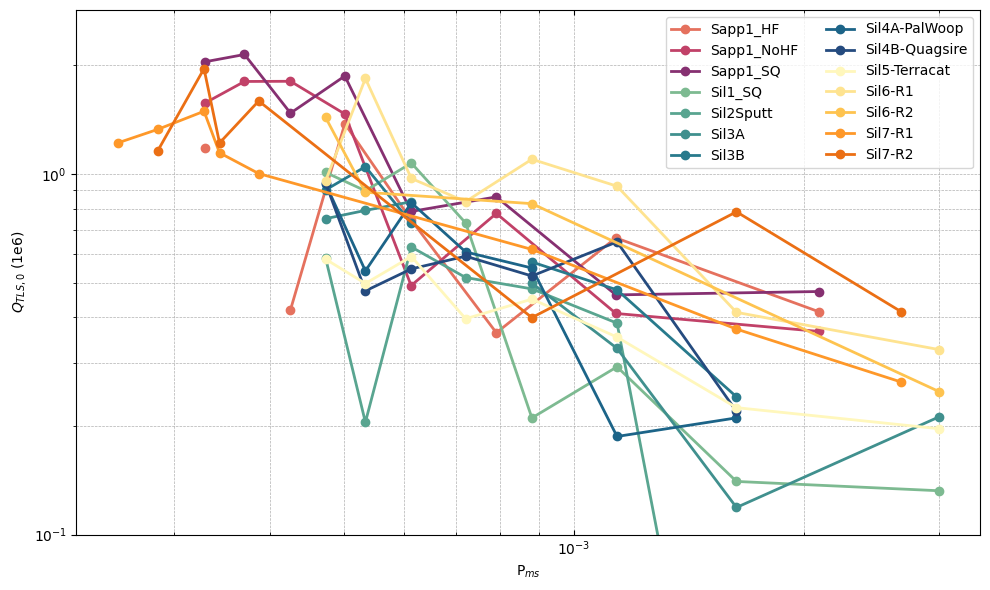

In [4]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(1,1, figsize=(10,6))
xval = 'P_ms'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 4
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil+3)
#col = b1+b2+b3
i=0
j=0
k=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        if group['Metal'].iloc[0]=='Ta':
            col=b3[k]
            k+=1
        else:
            col = b2[j]
            j+=1
    else:
        col = b1[i]
        i+=1
    group = group.sort_values(by=xval)
    #print(group)
    #print(f"Group: {name}")
    #print(group['Gap (um)'])
    ax.loglog(group[xval], group['QTLS0 (1e6)'], 'o-',linewidth=2, label=name, color=col)
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax.legend(ncol=2, fontsize=10)
ax.set_ylim(bottom=0.1)
ax.set_ylabel('$Q_{TLS,0}$ (1e6)')
ax.set_xlabel('P$_{ms}$')
# ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
# ax[2].set_ylabel('$Q_{c}$ (1e6)')
# ax[3].set_ylabel('Freq. Ratio')

# for a in ax: 
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', which='both', direction='in', top=True, bottom=True)
#     a.set_xscale('log')
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

# Single sample

In [2]:
colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax = ax.flatten()
xval = 'P_ms'
#xval = 'Target Freq. (GHz)'
group = notion_df[notion_df['Name'] == 'Sil7-R2']

group = group.sort_values(by=xval)
#print(group)
#print(f"Group: {name}")
#print(group['Gap (um)'])
ax[0].semilogy(group[xval], group['QTLS0 (1e6)'], 'o-')
ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-')
ax[2].semilogy(group[xval], group['Qc (1e6)'], 'o-')
ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-')
    #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
ax[0].legend(ncol=2, fontsize=8)
ax[0].set_ylim(bottom=0.05)
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')

for a in ax: 
    a.set_xlabel(xval)
    a.set_xscale('log')


qc = [0.184,  0.4734, 0.3847,0.1394, 0.2640, 0.6906, 1.825, 15.88]
#ax[2].plot(group[xval], qc, 'o-', label='Qc (1e6) from fit', color='black')

fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")

NameError: name 'sns' is not defined